<font size="+5">#02. Machine Learning & Linear Regression</font>

<ul>
    <li>Doubts? → Ask me in <img src="https://emoji.gg/assets/emoji/3970-discord.png" style="height: 1em; vertical-align: middle;"> <a href="https://discord.gg/cmB3KGsqMy">Discord</a></li>
    <li>Tutorials → <img src="https://openmoji.org/php/download_asset.php?type=emoji&emoji_hexcode=E044&emoji_variant=color" style="height: 1em; vertical-align: middle;"> <a href="https://www.youtube.com/channel/UCovCte2I3loteQE_kRsfQcw">YouTube</a></li>
    <li>Book Private Lessons → <span style="color: orange">@</span> <a href="https://sotastica.com/reservar">sotastica</a></li>
</ul>

# Load the Data

> - Simply execute the following lines of code to load the data.
> - This dataset contains **statistics about Car Accidents** (columns)
> - In each one of **USA States** (rows)

In [3]:
import seaborn as sns

df = sns.load_dataset(name='car_crashes', index_col='abbrev')
df.sample(10)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
abbrev,,,,,,,
AK,18.1,7.421,4.525,16.290,17.014,1053.48,133.93
NC,16.8,6.552,5.208,15.792,13.608,708.24,127.82
TX,19.4,7.760,7.372,17.654,16.878,1004.75,156.83
VA,12.7,2.413,3.429,11.049,11.176,768.95,153.72
KS,17.8,4.806,4.272,13.706,15.130,780.45,133.80
WA,10.6,4.452,3.498,8.692,9.116,890.03,111.62
OR,12.8,4.224,3.328,8.576,11.520,804.71,104.61
MD,12.5,4.250,4.000,8.875,12.375,1048.78,192.70
DE,16.2,6.156,4.860,14.094,16.038,1137.87,151.48


In [ ]:
df.mean()

total              15.790196
speeding            4.998196
alcohol             4.886784
not_distracted     13.573176
no_previous        14.004882
ins_premium       886.957647
ins_losses        134.493137
dtype: float64

In [10]:
for i in df:
    suma = sum(df[i])
    n_personas = len(df[i])
    
    media = suma/n_personas
    print(media)

15.79019607843137
4.998196078431373
4.88678431372549
13.573176470588232
14.004882352941172
886.9576470588232
134.49313725490197


# Data Visualization to Analyize Patterns

> Choose two variables that have a relationship. For example, would the `total` number of accidents **increase** if alcohol also increases?
> As the 2 variables are **numerical**, visualize the data with a `scatterplot()`.
> 
> - Is there a figure that can represents the relationship between these 2 variables? Which one?

<AxesSubplot:xlabel='alcohol', ylabel='total'>

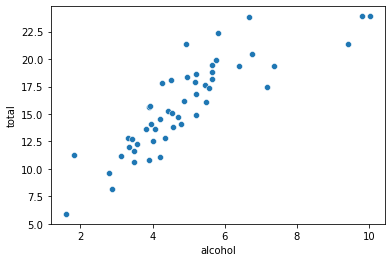

In [3]:
sns.scatterplot(x='alcohol',y='total',data=df)

# Machine Learning, what does it mean?

> - The Machine Learns...
>
> But, **what does it learn?**

In [4]:
%%HTML
<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr">Machine Learning, what does it mean? ⏯<br><br>· The machine learns...<br><br>Ha ha, not funny! 🤨 What does it learn?<br><br>· A mathematical equation. For example: <a href="https://t.co/sjtq9F2pq7">pic.twitter.com/sjtq9F2pq7</a></p>&mdash; Jesús López (@sotastica) <a href="https://twitter.com/sotastica/status/1449735653328031745?ref_src=twsrc%5Etfw">October 17, 2021</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

# How does the Machine Learn?

## In a Linear Regression

In [1]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/Ht3rYS-JilE" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

## In a Neural Network

In [11]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/IHZwWFHWa-w?start=36" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

A Practical Example → [Tesla Autopilot](https://www.tesla.com/AI)

An Example where It Fails → [Tesla Confuses Moon with Semaphore](https://twitter.com/Carnage4Life/status/1418920100086784000?s=20)

# `LinearRegression()` Model in Python

## Build the Model

> 1. **Necesity**: Build Model
> 2. **Google**: How do you search for the solution?
> 3. **Solution**: Find the `function()` that makes it happen

## Code Thinking

> Which function computes the Model?
> - `fit()`
>
> How could can you **import the function in Python**?

In [2]:
df

NameError: name 'df' is not defined

In [7]:
fit()

NameError: name 'fit' is not defined

`algo.fit()`

In [8]:
algo.fit()

NameError: name 'algo' is not defined

`algo = ?`

In [9]:
algo = LinearRegression()

NameError: name 'LinearRegression' is not defined

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
algo = LinearRegression()

In [12]:
algo.__dict__

{'fit_intercept': True,
 'normalize': False,
 'copy_X': True,
 'n_jobs': None,
 'positive': False}

In [13]:
algo.fit()

TypeError: fit() missing 2 required positional arguments: 'X' and 'y'

### Separate Variables for the Model

> Regarding their role:
> 1. **Target Variable `y`**
>
> What would you like **to predict**?
>
> Total number of accients? Or Alcohol?
>
> 2. **Explanatory Variable `X`**
>
> Which variable will you use **to explain** the target?

In [17]:
explanatory = df[['alcohol']]
target = df['total']

### Finally `fit()` the Model

In [18]:
algo.fit(X=explanatory, y=target)

LinearRegression()

In [19]:
algo.__dict__

{'fit_intercept': True,
 'normalize': False,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 1,
 'coef_': array([2.0325063]),
 '_residues': 231.9688865331006,
 'rank_': 1,
 'singular_': array([12.22681605]),
 'intercept_': 5.857776154826299}

## Model's Mathematical Equation

> A model is nothing more than a mathematical equation that **helps you to calculate** something. For example:
>
> 1. **Churn**: which is the probability for this client not to buy me anymore?
> 2. **Credit Approval**: which is the probability for this client to pay the credit?
> 3. **Athlete's Injury**: which is the probability for this athlete to have an injury in the next game?
> 4. **Car Rental**: how many cars will people rent tomorrow?
>
> For our case: **how many accidents** the State will have (based on alcohol)?
> - Which is the mathematical equation?

$$
accidents = 5.85 + 2.03 \cdot alcohol
$$

## Model Interpretation

> - How many accidents will happen for every **one unit increase in alcohol**?

## External Code Execution

> - What have happened **inside the computer** to get the model equation?

## Calculate a Prediction with the Model

> **Programming thiking:**
>
> - Which `function()` can we use to make a prediction?
> - How can you answer yourself **without searching in Google**?

## Model Visualization

> 1. What would happend if you **plot the predictions**?
> 2. And the **real data**?

# How good is my model? **Goodness of Fit**

> - How can we compare **reality vs. predictions**?

# Other Regression Models to Calculate Accidents

> Tutorial → [Why All Machine Learning Models Are the Same](https://blogsotastico.com/why-all-machine-learning-models-are-the-same)

## `RandomForestRegression()`

In [5]:
from sklearn.ensemble import RandomForestRegressor
model3=RandomForestRegressor()

In [7]:
import seaborn as sns
sns.load_dataset('mpg')
df=sns.load_dataset('mpg')


In [8]:
model3.fit(X=df[['weight']],y=df['mpg'])

RandomForestRegressor()

In [9]:
model3.__dict__

{'base_estimator': DecisionTreeRegressor(),
 'n_estimators': 100,
 'estimator_params': ('criterion',
  'max_depth',
  'min_samples_split',
  'min_samples_leaf',
  'min_weight_fraction_leaf',
  'max_features',
  'max_leaf_nodes',
  'min_impurity_decrease',
  'min_impurity_split',
  'random_state',
  'ccp_alpha'),
 'bootstrap': True,
 'oob_score': False,
 'n_jobs': None,
 'random_state': None,
 'verbose': 0,
 'warm_start': False,
 'class_weight': None,
 'max_samples': None,
 'criterion': 'mse',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'ccp_alpha': 0.0,
 'n_features_in_': 1,
 'n_features_': 1,
 'n_outputs_': 1,
 'base_estimator_': DecisionTreeRegressor(),
 'estimators_': [DecisionTreeRegressor(max_features='auto', random_state=1391804610),
  DecisionTreeRegressor(max_features='auto', random_state=828222369),
  Decision

In [10]:
model3.predict(X=df[['weight']])
pred=model3.predict(X=df[['weight']])

In [11]:
pred

array([18.016     , 14.976     , 17.36525   , 16.17525   , 17.105     ,
       15.206     , 14.716     , 14.39      , 13.79      , 15.82      ,
       16.618     , 15.758     , 14.63      , 17.295     , 26.298     ,
       21.915     , 18.48      , 22.123     , 33.7896627 , 32.62693333,
       25.22866667, 27.671     , 24.798     , 27.174     , 23.2145    ,
       10.7       , 11.629     , 12.454     , 10.85      , 33.7896627 ,
       27.7529    , 24.406     , 27.99793333, 22.62197619, 16.553     ,
       16.986     , 18.64      , 18.054     , 14.8795    , 13.54825   ,
       14.58      , 13.73      , 11.98      , 12.73      , 12.49      ,
       19.144     , 21.27183333, 18.074     , 18.21      , 24.72      ,
       26.2485    , 31.6895    , 31.8956    , 32.45      , 34.505     ,
       29.31018333, 26.95416667, 23.62      , 28.05242857, 24.3948    ,
       21.27183333, 22.718     , 13.83      , 13.274     , 15.        ,
       14.46      , 15.267     , 11.92      , 13.17633333, 12.72

In [13]:
dfsel = df[['weight', 'mpg']].copy()

In [14]:
dfsel['pred_rfr'] = pred

In [15]:
dfsel

,weight,mpg,pred_rfr
0,3504,18.0,18.016000
1,3693,15.0,14.976000
2,3436,18.0,17.365250
3,3433,16.0,16.175250
4,3449,17.0,17.105000
...,...,...,...
393,2790,27.0,23.904000
394,2130,44.0,33.789663
395,2295,32.0,31.002033
396,2625,28.0,27.031000


In [16]:
model3.score(X=df[['weight']],y=df['mpg'])

0.915052481077816

<AxesSubplot:xlabel='weight', ylabel='mpg'>

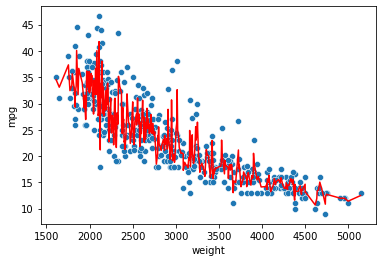

In [17]:
sns.scatterplot(x='weight', y='mpg', data=df)
sns.lineplot(x='weight', y='pred_rfr', data=dfsel, color='red')

## `SVR()`